In [ ]:
#import necessaries package, libray
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


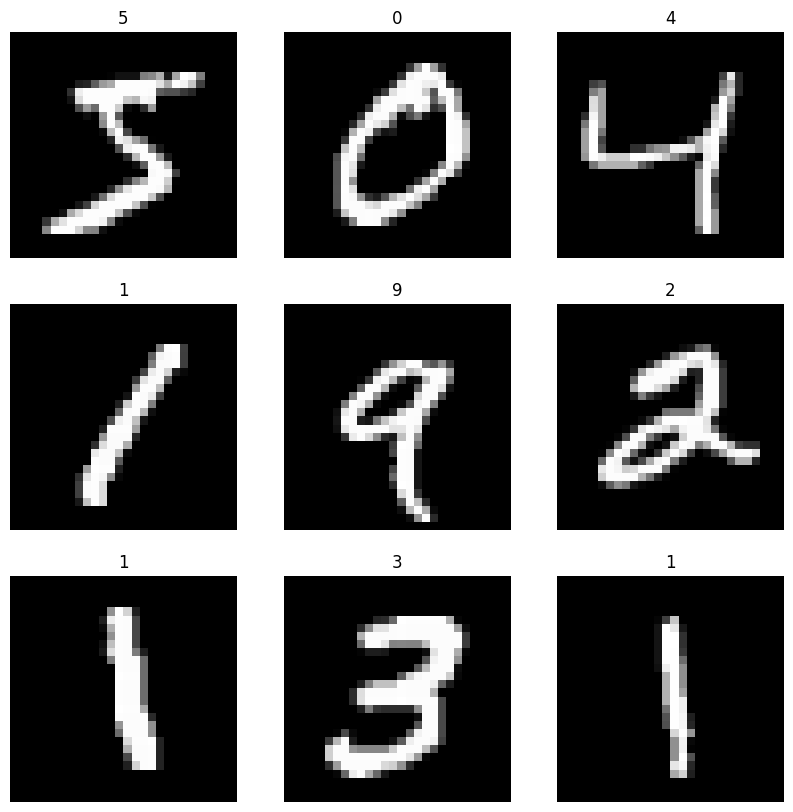

In [ ]:
# plot the digit with title
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(str(y_train[i]))
  plt.axis('off')
plt.show()

In [ ]:
# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Convert to float
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [ ]:
# Define CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding ='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding ='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding ='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 6272)              0

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 20s 5ms/step - loss: 0.1154 - accuracy: 0.9644 - val_loss: 0.0412 - val_accuracy: 0.9860
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0209 - val_accuracy: 0.9927
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0273 - val_accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0363 - val_accuracy: 0.9903


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:",100 - test_loss)

Test accuracy: 99.9636972732842


In [ ]:
# predicted the model
test_predict = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


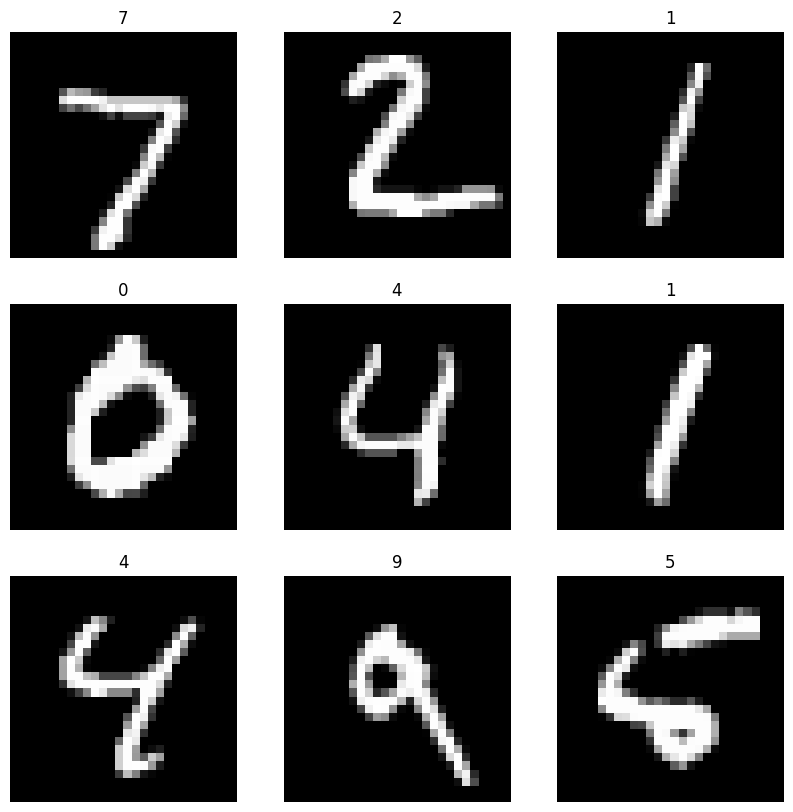

In [ ]:
# show the predicated of tested data

#set size of image
plt.figure(figsize=(10,10))
for i in range(9):

  #subplot the testing data
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i], cmap='gray')

  #set the predicated title
  plt.title(np.argmax(test_predict[i]))
  plt.axis('off')
plt.show()